# A very short introduction before to take the plunge

<p>The objective fo the course is to understand what is "Sentiment Analysis and Opinion Mining" (SAOM).</p>

<p>For that, I propose this first session consisting in discovering data used for this NLP task and a first model with all classical steps: data (tokenization, segmentation into train/dev/test parts), programmation of the model, evaluation of the performance.</p>





# Predicting the positive/negative labels for movie reviews

The objective of this programming work is to program a method for predicting the positive/negative label of a movie review.

"Positive" or "Negative" is a binary opinion about something, here, a movie. The review explains what is good and what is not goodin the movie, and then, sommeone (the labeller) labels the review with "+" or "-" according to a labelling guideline.

Thrn, if we have numerous reviews with "+/-" labels, it is possible to extract a predictive model which can give the "+' pr the '-" opinion to a new review.

You will use a movie review database built by Pang and Lee, in 2008. This data provides textual data for movie reviews. I give below two examples of such movie reviews :

The former : "this film is extraordinarily horrendous and I'm not going to waste any more words on it." is quite negative.

The latter : "this three hour movie opens up with a view of singer/guitar player/musician/composer frank zappa rehearsing with his fellow band members. All the rest displays a compilation of footage, mostly from the concert at the palladium in new york city, halloween 1979. Other footage shows backstage foolishness, and amazing clay animation by Bruce Bickford. the performance of "titties and beer" played in this movie is very entertaining, with drummer terry bozzio supplying the voice of the devil. Frank's guitar solos outdo any van halen or hendrix I've ever heard. Bruce Bickford's outlandish clay animation is that beyond belief with zooms, morphings, etc. and actually, it doesn't even look like clay, it looks like meat." gives an positive opinion on the movie.

<p>Pang and Lee labeled 1000 movie reviews with the 'positive' label and 1000 movie reviews with the 'negative' label.</p>

# Dealing with the movie review database

Firstly, let's manipulate the movie review database with Python.

This ressource is included in the nltk package:

In [1]:
import nltk
import numpy as np
nltk.download("movie_reviews")

from nltk.corpus import movie_reviews

negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

print(negids[0])
print(negids[0:10])
print(len(negids),len(posids))

neg/cv000_29416.txt
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
1000 1000


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/sharmila/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


As you can see in this example, the package movie_reviews defines a funtion fileids which can list the id of the negative ou positive reviews.

For me, the corpus is located in C:\Users\langlois\AppData\Roaming\nltk_data\corpora\movie_reviews\neg. I invite you to find such a location, and then, you can open positive and negative review documents. For example, find the cv000_29416.txt negative review.

The Python API allows to get the text of a review. You have to give to the function 'word' the list of the ids of the reviews you want the raw content:

In [2]:
t = movie_reviews.words(fileids = [negids[0]])
print(t[0:100])


['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to']


As you can see, the words are given inside a list, and the tokenization is yet applied. Remark that no lemmatization is applied.

OK, now we can access to every movie review, we can access to the document content. Moreover, as the reviews are located in 'pos' and 'neg' directories, we know which ones are 'positive' and which ones are 'negative' (I recall that this labels have been given to reviews by Pang eta al. decisions.

Now, we can compute statistics onto this textual material. Let's go!

# Work for you 1

Count the frequency of a word into negative documents and positive documents. For each word $w$ in the corpus (all words in all positive and negative documents), you have to give the number of positive documents $POS(w)$ that contain the word, and the number of negative documents $NEG(w)$ that contain $w$.

$$POS(w)= |\{d \in C_{p}\ s.t.\ w \in d\}|$$

$$NEG(w)= |\{d \in C_{n}\ s.t.\ w \in d\}|$$

where $C_{p}$ is the set of positive documents and $C_{n}$ is the set of negative documents.




Compare the values for positive and negative documents. Do you see something interesting?

Try it for "ugly", "bad", "good", "interesting", "movie".

In [3]:
## give your code here
pos_count = dict()
neg_count = dict()

for neg_id in negids:
    words = movie_reviews.words(fileids = [neg_id])
    words = set(words)
    for word in words:
        if word in neg_count:
            neg_count[word] += 1
        else:
            neg_count[word] = 1

            
for pos_id in posids:
    words = movie_reviews.words(fileids = [pos_id])
    words = set(words)
    for word in words:
        if word in pos_count:
            pos_count[word] += 1
        else:
            pos_count[word] = 1

How many different words are in $C_{p} \cup C_{n}$?

In [4]:
## give your code here
common = set(pos_count.keys()).intersection(set(neg_count.keys()))
print("length of common words:", str(len(common)))

length of common words: 19129


Build the set of words $\{W_{p/n}\}$ that are in $C_{p}$ and not in $C_{n}$.

In the same way, build the set of words $\{W_{n/p}\}$ that are in $C_{n}$ and not in $C_{p}$.

Print the most 5 frequent words in $\{W_{p/n}\}$ and the most 5 frequent words in $\{W_{n/p}\}$.

Do you remark if there are clearly 'positive' words in $\{W_{p/n}\}$? And if there are clearly 'negative' words in $\{W_{n/p}\}$?

In [5]:
## give your code here
w_o_p = { key:value for key, value in pos_count.items() if key not in common}
w_o_n = { key:value for key, value in neg_count.items() if key not in common}

## give your comment below
print("Most frequent positive words:")
sorted_pos = sorted(w_o_p.items(), key=lambda kv: kv[1], reverse=True)[:5]
print(sorted_pos)
print("Most frequent negative words:")
sorted_neg = sorted(w_o_n.items(), key=lambda kv: kv[1], reverse=True)[:5]
print(sorted_neg)

Most frequent positive words:
[('en', 14), ('lovingly', 14), ('melancholy', 13), ('missteps', 12), ('ideals', 12)]
Most frequent negative words:
[('degenerates', 13), ('horrid', 10), ('pathetically', 10), ('tedium', 10), ('plodding', 9)]


# Work for you 2

I have an hypothsis: I am certain that negative reviews tend to be short and that positive reviews tend to be long. Maybe we could use the information 'length of the review' in order to predict the positivity or the negativity of the review?

For that, we could firstly compute the average length of the negative reviews and the positive reviews.

Extract statistics for the negative reviews and for the positive reviews. We want the histogram of lengths of documents, by buckets of size equal to 100. Do you see a difference of distribution between negative reviews and positive reviews?

In [6]:
## give your code below
total = 0
count= 0
for neg_id in negids:
    sents = movie_reviews.words(fileids = [neg_id])  
    total += len(sents)
    count += 1
        
print("average document length of negative review:", str(total/count))

t = 0   
c = 0
for pos_id in posids:
    sents = movie_reviews.words(fileids = [pos_id])
    t += len(sents)
    c += 1
print("average document length of positive review:", str(t/c))

average document length of negative review: 751.256
average document length of positive review: 832.564


OK, we want a more precise information.

We want the histogram of lengths of documents, by buckets of size equal to 100:

+ how many positive documents are of length between 1 and 99?
+ how many positive documents are of length between 100 and 199?
+ how many positive documents are of length between 200 and 299?
+ and so on

+ how many negative documents are of length between 1 and 99?
+ how many negative documents are of length between 100 and 199?
+ how many negative documents are of length between 200 and 299?
+ and so on

Plot the both histograms on the same graph? Do you see a strong difference of distribution between negative reviews and positive reviews?

Then, do you think that the length of the review is a good indicator for the positivity or the negativity of the review?

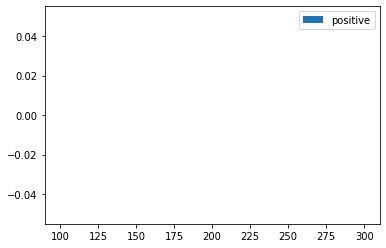

category		DocumentLength		number of doc
Positive		1-99			 0
Positive		100-199			 4
Positive		199-299			 23
Negative		1-99			 987
Negative		100-199			 13
Negative		199-299			 0


In [7]:
## give your code below
from matplotlib import pyplot

bins = [100,200,300]
t_p_1 = 0
t_p_2 = 0
t_p_3 = 0
r_p = 0
for pos_id in posids:
   
    words = movie_reviews.words(fileids = [pos_id])
    if len(words) <100:
        t_p_1 += 1
    elif len(words) >= 100 and len(words) < 200:
        t_p_2 += 1
    elif len(words) >= 200 and len(words) < 300:
        t_p_3 += 1
    else:
        r_p += 1



t_n_1 = 0
t_n_2 = 0
t_n_3 = 0
r_n = 0
for neg_id in negids:
    sent = movie_reviews.sents(fileids = [neg_id])
    if len(sent) <100:
        t_n_1 += 1
    elif len(sent) >= 100 and len(sent) < 200:
        t_n_2 += 1
    elif len(sent) >= 200 and len(sent) < 300:
        t_n_3 += 1
    else:
        r_n += 1

## give your comments below
x = [t_p_1, t_p_2, t_p_3]
y = [t_n_1, t_n_2, t_n_3]
#pyplot.hist(x, bins)

pyplot.hist(x,bins,bins, label='positive')
pyplot.legend(loc='upper right')
pyplot.show()

print("category\t\tDocumentLength\t\tnumber of doc")
print("Positive\t\t1-99\t\t\t", t_p_1)
print("Positive\t\t100-199\t\t\t", t_p_2)
print("Positive\t\t199-299\t\t\t", t_p_3)
print("Negative\t\t1-99\t\t\t", t_n_1)
print("Negative\t\t100-199\t\t\t", t_n_2)
print("Negative\t\t199-299\t\t\t", t_n_3)


# Segmentation of the corpus into a train part and a test part

We abandon the idea based on the length.

Now we are going to build a predictive model based on the words contained in the review. Our hypothesis is that there are 'positive' words, and 'negative' words. For example, if the review contains 'perfect' it is certainly a positive review.

When you want to estimate a predictive model and evaluate it, you have to estimate the predictive model on a train part, and you have to evaluate the predictive performance on a __separate__ test part. Moreover, maybe in the future you will need to estimate hyper-parameters (for example, the weights of the linear combination between two models): then you havealse to deal with a __separate__ development part (also called tuning set).

For, that, I propose the following code:

In [8]:
train_negids = negids[0:int(0.6*len(negids))]
dev_negids = negids[int(0.6*len(negids)):int(0.8*len(negids))]
test_negids = negids[int(0.8*len(negids)):]

train_posids = posids[0:int(0.6*len(posids))]
dev_posids = posids[int(0.6*len(posids)):int(0.8*len(posids))]
test_posids = posids[int(0.8*len(posids)):]

print(len(train_negids))
print(len(dev_negids))
print(len(test_negids))
print(len(train_posids))
print(len(dev_posids))
print(len(test_posids))

600
200
200
600
200
200


# The predictive model

[Dave et al., 2003] propose the following strategy to predict the label of a movie review :

$$\mathcal{P}$$

The score of a word $w$ is defined by:

$$ score(w) = \frac{P(w|\mathcal{P})-P(w|\mathcal{N})}{P(w|\mathcal{P})+P(w|\mathcal{N})}$$

Where $P(w|\mathcal{P})$ is the probability that the word $w$ occurs in a positive document, and $P(w|\mathcal{N})$ is the probability that the word $w$ occurs in a negative document of the training corpus.

Then, the 'positivity' of a document $d$ is given by:

$$eval(d) = \sum_{w\ \in \ set(d)} score(w)$$

where the sum is applyed on the set of words in $d$ (a word occuring several times in $d$ is counted only once in the sum).

Then, the decision follows the following condition: if  $eval(d) > 0$ then a document in the test part positive else the document is negative



# Estimating the parameters of the predictive model

The parameters of this predictive model are all the $P(w|\mathcal{P})$ and the $P(w|\mathcal{N})$ for all the words $w$ in the positive and negative documents.

__Work__: compute these values on the training corpus.

For estimating the $P(w|\mathcal{P})$, iterate on all the positive documents in the train positive part. $P(w|\mathcal{P})$ is estimated by the formula:

$$P(w|\mathcal{P}) = \frac{|sum_{d \in \{\mathcal{P}_{train}\}} \delta(w,d)|}{|\{\mathcal{P}_{train}\}|}$$

where $\{\mathcal{P}_{train}\}$ is the set of documents in the positive train part, and  $\delta(w,d)$ is equal to 1 if $w$ is in $d$, 0 otherwise. 

The formula is the same for $P(w|\mathcal{N})$:

$$P(w|\mathcal{N}) = \frac{|sum_{d \in \{\mathcal{N}_{train}\}} \delta(w,d)|}{|\{\mathcal{N}_{train}\}|}$$


In [9]:
## give your code below
def test(document):
    eval_s = 0
    for word in set(document):
        p_w_p = pos_count.get(word,0)/len(posids)
        p_w_n = neg_count.get(word,0)/len(negids)
        score_w = (p_w_p - p_w_n)/(p_w_p + p_w_n)
        eval_s += score_w
    return eval_s
        

# Evaluating the predictive model

We want to know if, on the test corpus, the decision strategy described above performs well or not. We want to know if when a document is labeled positive by Pang et al., the document is predicted as positive by the model, and so on for a negative document.

We are going to evaluate the following statistics on the test corpus.

When the model predict 'positive', the document could be actually 'positive': this is a true positive ($tp$). But, the document may be actually 'negative': this is a false positive ($fp$).

In the same way, when the model predict 'negative', the document could be actually 'negative': this is a true negative ($tn$). But, the document may be actually 'positive': this is a false negative ($fn$).

Note that, there are the following constraints:

+ $tp+fp=n$
+ $fn+tn=n$
+ $tp+fn=n$
+ $fp+tn=n$ 

where $n$ is the number of documents (positive or negative).

these notations can be sumarized into the following table

<table>
    <tr>
        <td>  </td>
        <td>  </td>
        <td colspan=2 style="text-align: center"> True label </td>
    </tr>
    <tr>
        <td>  </td>
        <td>  </td>
        <td> positive </td>
        <td> negative </td>
    </tr>    
    <tr>
        <td rowspan=2 style="vertical-align: center"> Predicted label </td>
        <td> positive </td>
        <td> true positive </td>
        <td> false positive </td>
    </tr>
    <tr>
        <td> negative </td>
        <td> false negative </td>
        <td> true negative </td>
    </tr>
</table>

Be careful: unfortunately, there is a trap in the used vocabulary; you have the labels 'positive' and 'negative' and these labels can be 'true positive', 'true negative', 'false positive', or 'false negative'. This is confusing. Sorry for that.

The recall evaluates how much the model can retrieve the correct decision:

$$recall = \frac{tp}{tp+fn}$$

The precision evaluates if the model does not sur-generate the positive or negative prediction:

$$precision = \frac{tp}{tp+fp}$$

Moreover, we can use the F1 measure which deals with precision and recall:

$$F1 = 2 \times \frac{precision \times recall}{precision + recall}$$

__Work__: evaluate on the test corpus the recall, the precision and the F1 measure.

In [10]:


def evaluation(pos_ids, neg_ids,alpha=0):
    
    t_p = 0
    t_n = 0
    f_p = 0
    f_n = 0
    for each in pos_ids:
        score = test(movie_reviews.words(each))

        if score >alpha:
            t_p += 1
        else:
            f_n += 1
    for each in neg_ids:
        score = test(movie_reviews.words(each))
        if score >alpha:
            f_p += 1
        else:
            t_n += 1

    #print("Accuracy is:", str((t_p+t_n)/(t_p+ t_n+ f_p+ f_n)))
    precision = t_p/(t_p+f_p)
    recall = t_p/(t_p+f_n)
  
    f1 = (2*precision*recall)/(precision+recall)
    #print("Precision is:", str(precision))
    #print("Recall is:", str(recall))
    #print("F1 Score is:", str((2*precision*recall)/(precision+recall)))
    return recall, precision,f1
evaluation(test_posids, test_negids)

(1.0, 0.970873786407767, 0.9852216748768473)

# Tuning the model

In the model by \[Dave et al., 2003\] a document $d$ is considered as positive if $eval(d)>0$. But maybe this value is not very precise. For exemple, if a document has a value $eval$ equal to 0.02, it has chance to be negative.

To check that, replace the decision $eval(d)>0 \Rightarrow positive$ by  $eval(d)>\alpha \Rightarrow positive$ where $\alpha$ is a threshold varying from a negative value to a positive value. Explore the range values of the $eval$ score on the test corpus. Iterate $\alpha$ from the minimum value of $\alpha$ to the maximum value of $\alpha$. You can not scan all the values: choose a step, and refine. For each tested value, compute the recall and the precision on the __development__ part, and graph the curve (precision,recall).



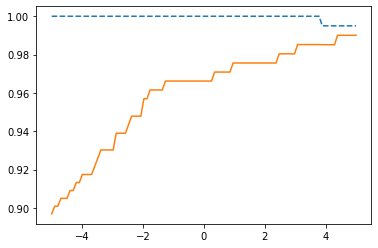

In [22]:
## give the code here
alphas = np.linspace(-5,5,100)
recalls = []
precisions = []
f1_max = 0
max_alpha = 0
for alpha in alphas:
    recall, precision, f1 = evaluation(pos_ids=dev_posids, neg_ids=dev_negids, alpha=alpha)
    recalls.append(recall)
    precisions.append(precision)
    if f1_max<f1:
        f1_max = f1
        max_alpha = alpha

pyplot.plot(alphas,recalls,linestyle='--',label = "Recall")
pyplot.plot(alphas,precisions, label="Precision")
pyplot.show()

In [12]:
print(max_alpha, f1) 

3.0808080808080813 0.9925187032418954


Then check for which value of $\alpha$ the F1 measure is the highest. Apply this value on the test part. Is the F1 measure increased?

In [13]:
## give the code below
evaluation(test_posids, test_negids, alpha=max_alpha)

## give your comment below

(1.0, 0.9900990099009901, 0.9950248756218906)